In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

### Notes
(Les idées viennent d'une tuto Youtube)

Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation

### Checklist de base

#### Objectifs :
- **immo-data** : 
    - Retrouver les différents profils de personnes qui souhaite acheter un appartement
    - Récupérer plus de données avec les filtres différents


#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 1654 lignes et dans notre méthode de scrapping, on ne prend pas en compte les valeurs manquantes
- **types de variables** :
    - Décider quels opérations réaliser sur les deux types de variables
    - qualitatifs : 
        - Adresse
        - Ville
        - Arrondissement
        - Type
    - quantitatifs : 
        - Prix (€)
        - Prix mensuel (€)
        - Pièce(s)
        - Surface (m2)
        - Date de vente
- **Analyse des valeurs manquantes** :
    - Nous n'avons pas de valeur manquante, mais nous devons les redéfinir (par exemple, on n'aurait pas besoin de ville et de prix original)
- **Notes random** :
    - On a beaucoup de outliers qui empêchent de bien visualiser les graphes (On le voit bien avec sns.pairplot). Solution : ?
    - Par exemple, je pense pas qu'on va garder les appartements à plus de 200 m² (en vrai pourquoi pas, mais y a trop peu de données dessus)
    - Ou alors avec quelques lignes de code et sklearn, détecter automatiquement les outliers et faire du pré-processing après ça.

#### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :

#### Analyse plus détaillée :
- **Relation Variables / Variables** :
- **NaN analyse** :

#### hypotheses nulle (H0) :
- Permet de voir si des analyses contiennent des changements significatifs

In [134]:
# Idées immo-data

In [135]:
# Idées century21

In [136]:
# Idées housedata

## Immo-data

In [137]:
file_path = 'data/immodataParis.csv'
data = pd.read_csv(file_path)

### Analyse de Forme :

#### Visualisation

In [138]:
df = data.copy()
df.shape
df.dtypes.value_counts() # Différentes types de données des colonnes

int64     5
object    4
Name: count, dtype: int64

In [139]:
df.head()

,Adresse,Ville,Arrondissement,Type,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2),Date de vente
0,270 RUE SAINT-HONORÉ,PARIS,75001,Appartement,750400,14431,2,52,22/05/2023
1,186 RUE DE RIVOLI,PARIS,75001,Appartement,330000,14348,1,23,28/04/2023
2,23 RUE DE RICHELIEU,PARIS,75001,Appartement,360100,15657,1,23,29/03/2023
3,27 RUE DE RICHELIEU,PARIS,75001,Appartement,286123,11005,1,26,10/02/2023
4,272 RUE SAINT-HONORÉ,PARIS,75001,Appartement,411636,12864,2,32,28/12/2022


In [140]:
df.columns

Index(['Adresse', 'Ville', 'Arrondissement', 'Type', 'Prix (€)',
       'Prix mensuel (€)', 'Pièce(s)', 'Surface (m2)', 'Date de vente'],
      dtype='object')

- **Adresse** : Valeur non unique (mais pas besoin pour les analyses)
- **Ville** : Même valeur (à retirer)
- **Arrondissement** : A regouper ?
- **Type** : A regrouper (beaucoup plus d'appartements que le reste... -> Récupérer plus de données pour les autres types)
- **Prix (€)** : A retirer ?
- **Prix mensuel (€)** : Pour la prédiction
- **Pièce(s)** : Sort
- **Surface (m2)** : Sort
- **Date de vente** : Il faut qu'on créer des analyses avec les dates (c'est possible)

#### Statistiques et Filtres

In [141]:
# Counting

nb_Value = df['Ville'].value_counts()

In [142]:
# Sorting

df.sort_values('Surface (m2)')

,Adresse,Ville,Arrondissement,Type,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2),Date de vente
762,142 RUE DU FAUBOURG SAINT-DENIS,PARIS,75010,Appartement,20000,6667,1,3,27/01/2022
687,46 RUE LAMARTINE,PARIS,75009,Appartement,19000,3800,1,5,01/04/2021
664,17 RUE DE CHÂTEAUDUN,PARIS,75009,Appartement,40000,8000,1,5,27/10/2021
552,2 RUE MALEVILLE,PARIS,75008,Appartement,60000,10000,1,6,23/05/2023
206,3 RUE PAUL DUBOIS,PARIS,75003,Appartement,105000,17500,1,6,06/11/2018
...,...,...,...,...,...,...,...,...,...
1232,77 AVENUE HENRI MARTIN,PARIS,75016,Appartement,2090000,6147,7,340,14/01/2023
1210,77 AVENUE HENRI MARTIN,PARIS,75016,Appartement,5271700,15505,7,340,26/06/2023
1283,87 AVENUE HENRI MARTIN,PARIS,75016,Appartement,5228950,13072,9,400,17/11/2021
362,151B RUE SAINT-JACQUES,PARIS,75005,Maison,19346000,43377,13,446,15/03/2021


/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


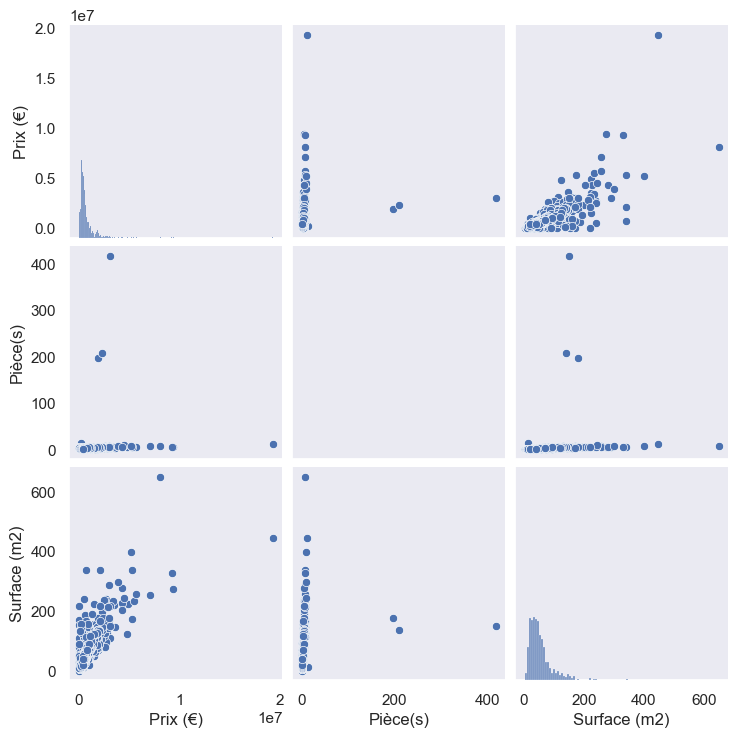

In [143]:
# Pour une meilleure visualisation, peut-être mettre de la couleur
# en fonction des labels correspondant à des clusters différents

sns.pairplot(df[['Prix (€)', 'Pièce(s)', 'Surface (m2)']])

In [144]:
# Clustering 
# Transformation Données > Normalisation > Clustering 
# (ce serait mieux que de directement faire du Clustering, le faire
# dans la partie Modelling)
# Dans la partie 'Modelling', il faudra ajuster le nombre de clusters
# Peut-être en utilisant GridSeachCV

from sklearn.cluster import AgglomerativeClustering

new_df = df[["Prix (€)","Pièce(s)","Surface (m2)"]]
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster_labels = clustering.fit_predict(new_df)
new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns

/var/folders/jl/05xr553n44v3_nqnn57t0f380000gn/T/ipykernel_2796/1874040981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns


/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


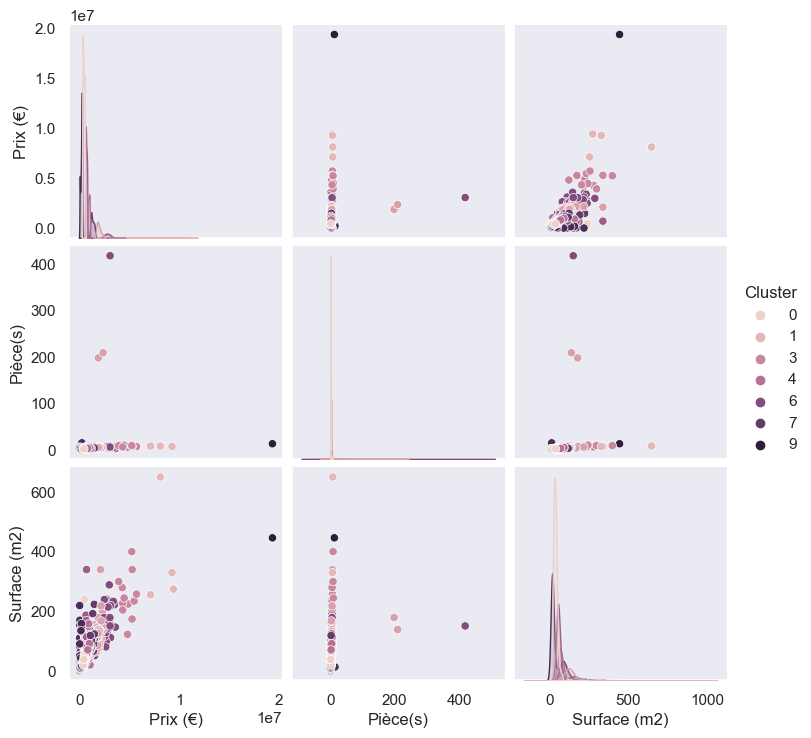

In [145]:
sns.pairplot(new_df, hue='Cluster')

#### Analyse de Fond :

In [146]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
# numerical_df = numerical_df.drop(columns=['Arrondissement'])
# numerical_df = numerical_df.drop(columns=['Prix (€)'])

numerical_df.describe(include='all')

,Arrondissement,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2)
count,1654.000000,1.654000e+03,1654.000000,1654.000000,1654.000000
mean,75010.814994,7.042688e+05,11563.597944,3.041112,57.406288
std,5.770641,9.048061e+05,4469.083216,12.453208,47.797117
min,75001.000000,0.000000e+00,0.000000,1.000000,3.000000
25%,75006.000000,2.900000e+05,9615.500000,2.000000,28.000000
50%,75011.000000,4.716035e+05,11272.000000,2.000000,45.000000
75%,75016.000000,7.700000e+05,13474.000000,3.000000,68.000000
max,75020.000000,1.934600e+07,47186.000000,418.000000,649.000000


# Analyse du prix mensuel

La moyenne des prix mensuels s'élève à environ 11563.60 €, illustrant ainsi le niveau moyen des loyers dans l'échantillon. Cependant, l'écart-type significatif de 4469.08 € souligne la dispersion considérable des valeurs autour de cette moyenne. Cela suggère que les prix des loyers peuvent varier considérablement d'une propriété à une autre, ce qui pourrait être attribuable à divers facteurs tels que l'emplacement, la taille ou l'état du bien.

Un point d'intérêt notable est le prix mensuel minimum de 0 €, ce qui est inhabituel et qui est sûrement une erreur.

Enfin, le prix mensuel le plus élevé, qui est de 47186.00 €, met en lumière la présence de biens immobiliers avec des loyers très élevés dans l'échantillon. Cette valeur extrême peut être le résultat de caractéristiques uniques de la propriété ou de son emplacement.

<Axes: >

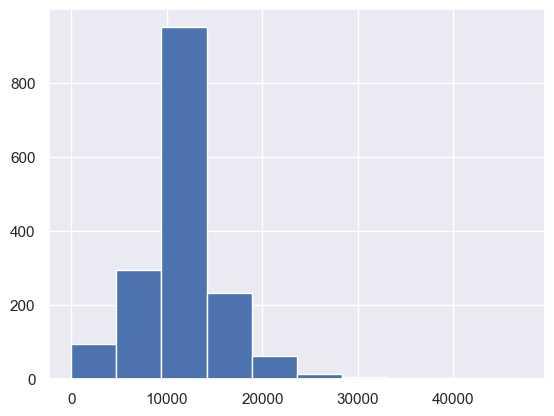

In [147]:
df["Prix mensuel (€)"].hist()

# Analyse nombre de pièce

L'analyse du nombre de pièces des biens immobiliers dans l'échantillon révèle une moyenne de 3 pièces. Cependant, cette moyenne est influencée par une valeur aberrante, à savoir un appartement avec 418 pièces. Une inspection plus approfondie des données CSV montre que cet appartement possède une surface de seulement 127 m², ce qui est peu probable compte tenu du nombre élevé de pièces.

Il est raisonnable de conclure que cette observation est probablement une erreur de saisie ou de collecte de données. Il est peu probable qu'un appartement de seulement 127 m² puisse accueillir 418 pièces de manière réaliste. Par conséquent, il est recommandé de traiter cette observation comme une valeur aberrante et de la corriger ou de la supprimer de l'échantillon, afin de ne pas fausser les analyses ultérieures.

<Axes: >

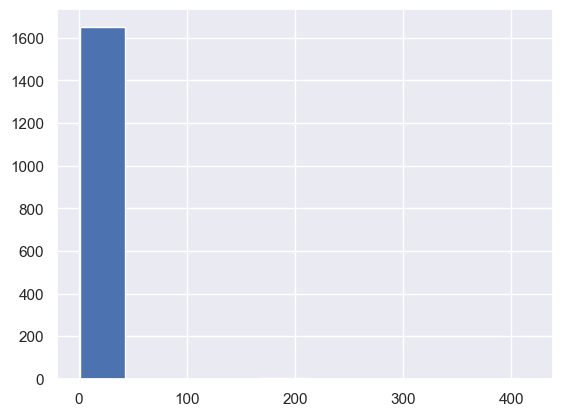

In [148]:
df["Pièce(s)"].hist()

# Analyse de la surface

La moyenne de la surface est estimée à environ 57.41 m², ce qui donne une indication de la taille moyenne des propriétés dans l'échantillon. Cependant, l'écart-type important de 47.80 m² suggère une grande variabilité dans les tailles des propriétés, ce qui signifie que les biens immobiliers peuvent avoir des surfaces très différentes les unes des autres.

Une observation notable est la surface minimale de 3 m², ce qui est inhabituellement petite pour un bien immobilier et soulève des doutes quant à la validité de cette valeur.

La distribution des surfaces est également révélée par les quartiles. Ainsi, 25% des biens immobiliers ont une surface inférieure à 28 m², tandis que 50% ont une surface inférieure à 45 m². De même, 75% des biens ont une surface inférieure à 68 m², ce qui montre comment la majorité des propriétés dans l'échantillon ont des surfaces relativement modestes.

Enfin, la surface maximale observée est de 649 m², indiquant la présence de biens immobiliers plus spacieux dans l'échantillon. Cette diversité de tailles des propriétés souligne l'importance de comprendre la répartition des surfaces pour toute analyse ou prise de décision liée au marché immobilier.

<Axes: >

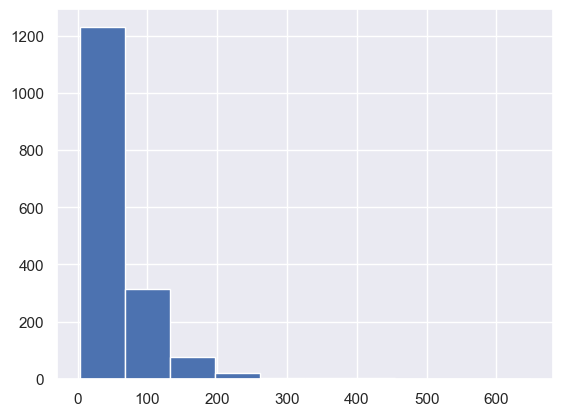

In [149]:
df["Surface (m2)"].hist()

# Analyse dataset

In [150]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(numerical_df)
data_scaled = scaler.transform(numerical_df)
dataStd = pd.DataFrame(data_scaled, columns=numerical_df.columns)

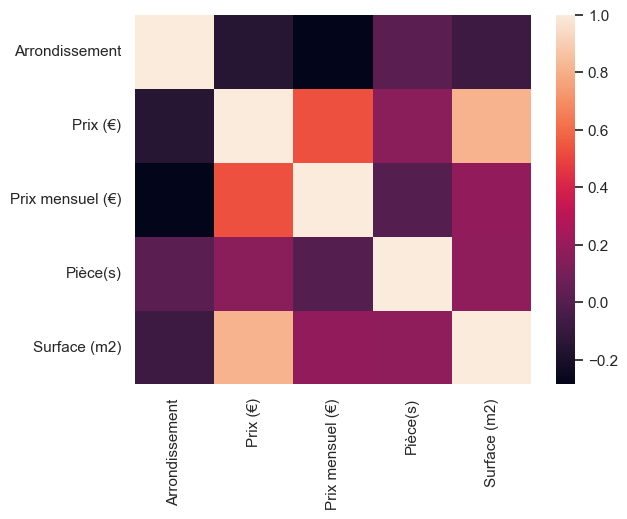

In [151]:
sns.heatmap(dataStd.corr());
# demande à la prof, j'ai l'impression qu'on ne peut rien interpreter dans cette heatmap

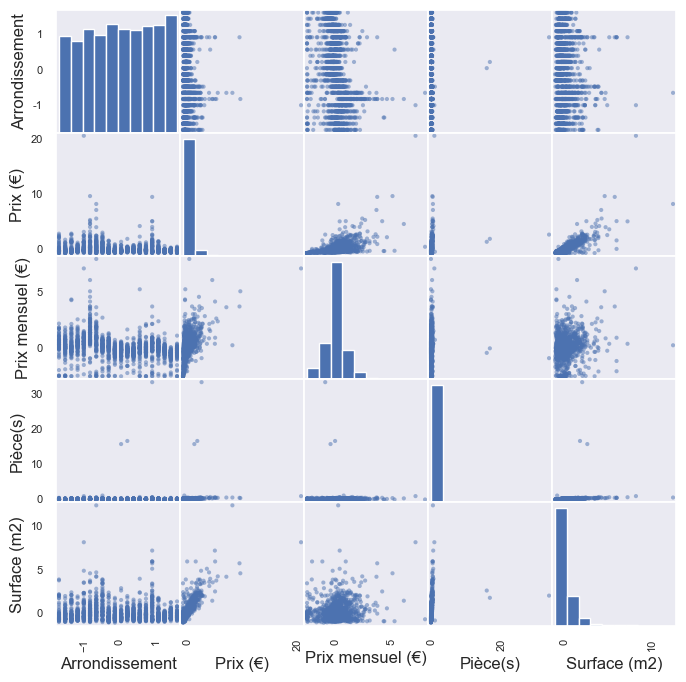

In [152]:
pd.plotting.scatter_matrix(dataStd, figsize=(8, 8));

On note que le nombre de pièces a une distribution concentrée avec des valeurs extrêmes, tandis que les prix et les surfaces présentent une large dispersion avec de nombreux points éloignés de la concentration principale, indiquant des valeurs extrêmes ou aberrantes. Le graphique inférieur droit identifie spécifiquement les valeurs aberrantes, isolant visiblement les données qui s'écartent de la tendance générale.

De plus on remarque une correlation entre la surface et prix car les points montrent globalement une tendance linéaire où y = x

# Outlier detection

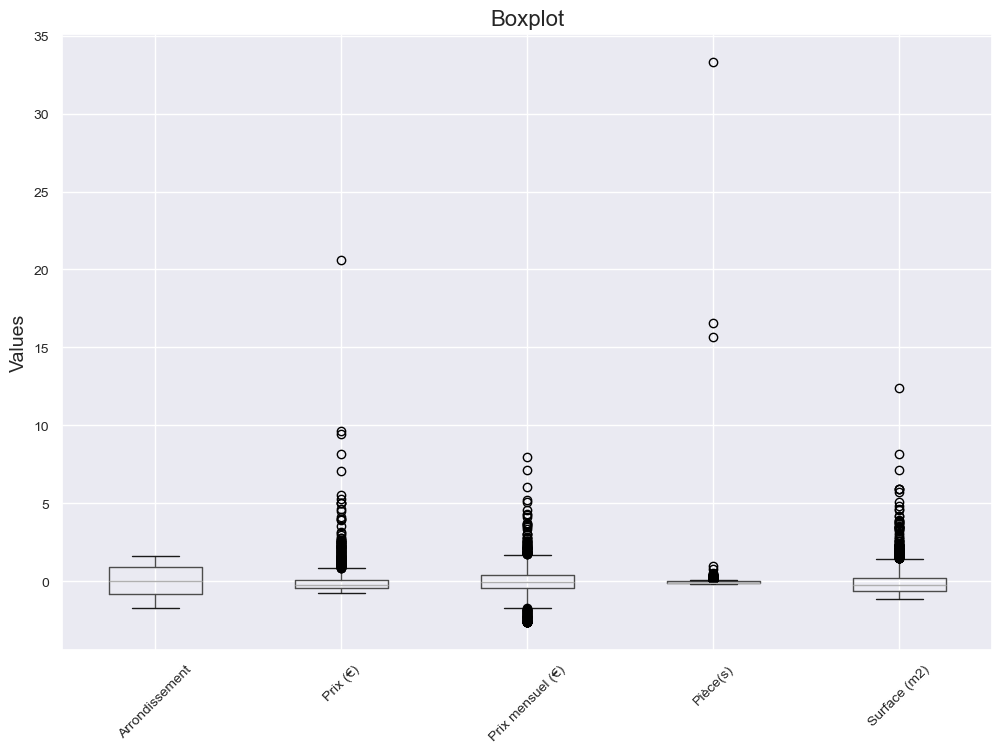

In [153]:
plt.figure(figsize=(12, 8))
# numerical_df = numerical_df.drop(columns=[''])

dataStd.boxplot(rot=45, fontsize=10)
plt.title("Boxplot", fontsize=16)
plt.ylabel("Values", fontsize=14)
plt.show()

Les catégories "Arrondissement" et "Pièces" ont des plages de valeurs relativement étroites et moins de valeurs aberrantes, ce qui suggère une distribution plus serrée des données. En revanche, "Prix (€)", "Prix mensuel (€)" et "Surface (m²)" montrent une plus grande variabilité avec de nombreuses valeurs aberrantes, indiquant des écarts importants dans les données. La médiane semble relativement basse pour les catégories "Prix" et "Surface", ce qui pourrait indiquer une asymétrie dans la distribution des prix et des tailles des surfaces.

In [154]:
outliers_count = 0

for col in dataStd.columns:
    col_values = dataStd[col]
    z_scores = (col_values - col_values.mean()) / col_values.std()
    outliers_count += (abs(z_scores) > 3).sum()

# Display the count of lines to be removed
print(f"Total lines to be removed: {outliers_count}")

Total lines to be removed: 72


In [155]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # You can adjust the contamination parameter

isolation_forest.fit(dataStd)
outlier_predictions = isolation_forest.predict(dataStd)

outliers_count = (outlier_predictions == -1).sum()

print(f"Total outliers identified: {outliers_count}")

Total outliers identified: 83


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

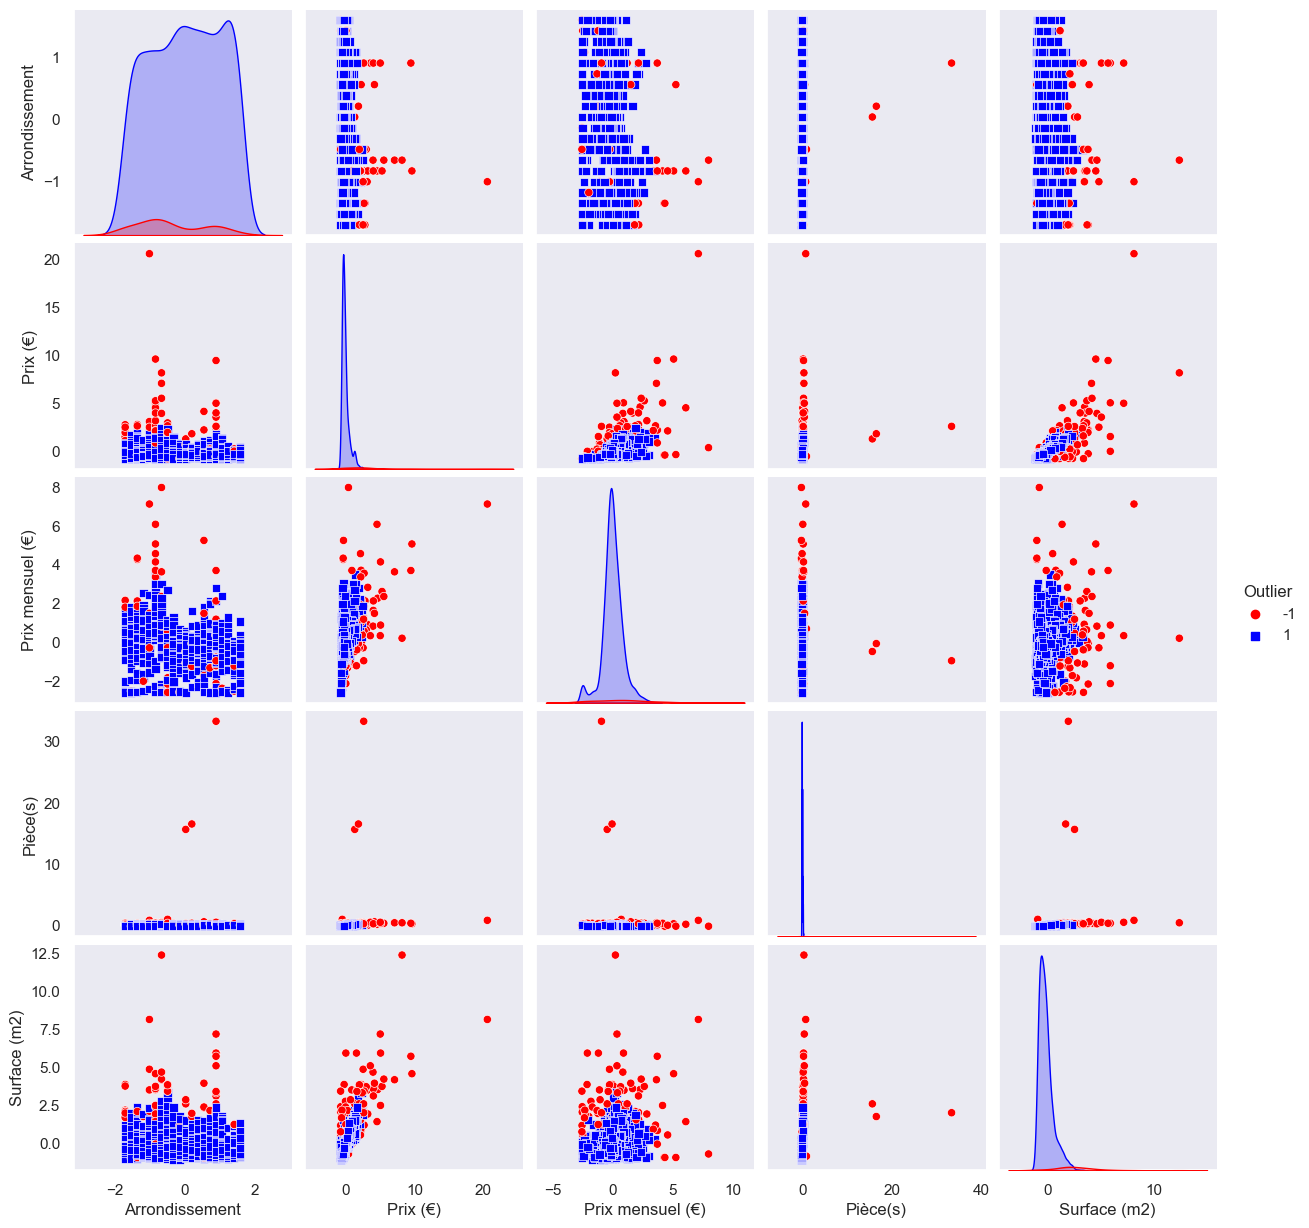

In [156]:
# Add a new column 'Outlier' to the DataFrame indicating whether each row is an outlier or not
dataStdCopy = dataStd.copy()
dataStdCopy['Outlier'] = outlier_predictions

# Create pair plots using seaborn
sns.set(style="dark")
sns.pairplot(dataStdCopy, hue='Outlier', palette={-1: 'red', 1: 'blue'}, markers=['o', 's'], height=2.5)
plt.show()

 Les points bleus représentent les données standard, tandis que les points rouges signalent des valeurs aberrantes. Il y a des distributions asymétriques pour le prix et la surface, comme en témoignent les longues queues sur les histogrammes de densité correspondants. Les nuages de points révèlent des corrélations possibles, par exemple entre le prix et la surface ou le prix mensuel et la surface. Les valeurs aberrantes sont particulièrement notables dans la relation entre le nombre de pièces et les autres variables, ce qui suggère des anomalies spécifiques, comme des appartements exceptionnellement grands ou chers par rapport au reste de l'échantillon.

#### Analyse plus détaillée :

#### hypotheses nulle (H0) :